In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Install all the Dependencies--------------------->

!pip install pandas numpy scikit-learn matplotlib plotly seaborn xgboost  --quiet in jupyter or colab notebook 


In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

c_green = '#6DF10C'
c_yellow = '#F5DD0D'
c_cyan = '#0FFDEF'
c_blue = '#0141DE'
c_blue_light =  '#2775FD'
c_purple = '#FF0DE5'
c_green_dark = '#1BB200'
e = np.e

## Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance

Files

train.csv - the training dataset; Exited is the binary target

test.csv - the test dataset; your objective is to predict the probability of Exited

sample_submission.csv - a sample submission file in the correct format

## Bank Churn Data?

https://www.akkio.com/post/bank-churn-prediction#:~:text=Customer%20churn%2C%20in%20this%20context,lending%20it%20out%20to%20borrowers.

In [3]:
train_df = pd.read_csv('csv\\train.csv')
test_df = pd.read_csv('csv\\test.csv')
submission_df = pd.read_csv('csv\\sample_submission.csv')

In [4]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [5]:
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
train_df.shape

(165034, 14)

In [8]:
train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
train_df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
test_df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [11]:
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
test_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [13]:
train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
input_cols = ['CustomerId','CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
target_col = 'Exited'

In [15]:
train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [17]:
train_inputs

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,15665521,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,15664752,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,15689614,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [18]:
test_inputs

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15773898,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,15782418,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,15807120,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,15808905,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,15607314,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...
110018,15662091,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,15774133,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,15728456,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,15687541,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [19]:
train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
numeric_cols = ['CustomerId','CreditScore','Age', 'Tenure', 
                'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary']

cat_cols = ['Geography', 'Gender']

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [24]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [25]:
train_inputs

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.436943,0.636,France,Male,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279
1,0.733936,0.554,France,Male,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483
2,0.515259,0.656,France,Male,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364
3,0.702895,0.462,France,Male,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787
4,0.801919,0.732,Spain,Male,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293
...,...,...,...,...,...,...,...,...,...,...,...
165029,0.405554,0.634,Spain,Female,0.202703,0.2,0.000000,0.000000,1.0,1.0,0.659179
165030,0.399298,0.884,France,Male,0.229730,0.3,0.000000,0.000000,0.0,0.0,0.659177
165031,0.396221,0.430,France,Male,0.175676,0.5,0.000000,0.000000,1.0,1.0,0.637151
165032,0.495674,0.408,Spain,Female,0.162162,0.7,0.643819,0.000000,0.0,1.0,0.355841


## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [28]:
encoder.fit(train_df[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [29]:
encoded_cols

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [30]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])

In [31]:
train_inputs

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.436943,0.636,France,Male,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,1.0,0.0,0.0,0.0,1.0
1,0.733936,0.554,France,Male,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,1.0,0.0,0.0,0.0,1.0
2,0.515259,0.656,France,Male,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,1.0,0.0,0.0,0.0,1.0
3,0.702895,0.462,France,Male,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,1.0,0.0,0.0,0.0,1.0
4,0.801919,0.732,Spain,Male,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.405554,0.634,Spain,Female,0.202703,0.2,0.000000,0.000000,1.0,1.0,0.659179,0.0,0.0,1.0,1.0,0.0
165030,0.399298,0.884,France,Male,0.229730,0.3,0.000000,0.000000,0.0,0.0,0.659177,1.0,0.0,0.0,0.0,1.0
165031,0.396221,0.430,France,Male,0.175676,0.5,0.000000,0.000000,1.0,1.0,0.637151,1.0,0.0,0.0,0.0,1.0
165032,0.495674,0.408,Spain,Female,0.162162,0.7,0.643819,0.000000,0.0,1.0,0.355841,0.0,0.0,1.0,1.0,0.0


In [32]:
test_inputs

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.832825,0.472,France,Female,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903,1.0,0.0,0.0,1.0,0.0
1,0.866906,0.666,France,Female,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723,1.0,0.0,0.0,1.0,0.0
2,0.965718,0.612,France,Female,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419,1.0,0.0,0.0,1.0,0.0
3,0.972859,0.662,France,Male,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654,1.0,0.0,0.0,0.0,1.0
4,0.166459,0.804,Germany,Male,0.270270,1.0,0.483318,0.000000,1.0,0.0,0.697164,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,0.385577,0.440,Spain,Male,0.148649,0.7,0.462737,0.000000,1.0,1.0,0.740451,0.0,0.0,1.0,0.0,1.0
110019,0.833765,0.450,France,Female,0.243243,0.4,0.709581,0.000000,1.0,1.0,0.210871,1.0,0.0,0.0,1.0,0.0
110020,0.651049,0.724,France,Male,0.175676,0.2,0.000000,0.333333,1.0,0.0,0.081387,1.0,0.0,0.0,0.0,1.0
110021,0.487381,0.718,France,Female,0.189189,0.3,0.000000,0.000000,1.0,1.0,0.794101,1.0,0.0,0.0,1.0,0.0


In [33]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_val, train_targets, val_targets = train_test_split(X_train, train_targets, test_size=0.1 ,random_state=0)

In [36]:
X_train

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
85560,0.925561,0.758,0.378378,0.1,0.393186,0.000000,1.0,1.0,0.424620,1.0,0.0,0.0,1.0,0.0
91087,0.390897,0.354,0.175676,0.6,0.511747,0.333333,1.0,1.0,0.399576,1.0,0.0,0.0,0.0,1.0
118362,0.315214,0.618,0.229730,0.7,0.514973,0.333333,1.0,0.0,0.222498,0.0,1.0,0.0,0.0,1.0
98210,0.308114,0.522,0.472973,0.3,0.333078,0.000000,0.0,0.0,0.006120,1.0,0.0,0.0,0.0,1.0
64520,0.535088,0.592,0.310811,0.2,0.413966,0.000000,0.0,0.0,0.366586,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97639,0.776890,0.418,0.364865,0.3,0.444939,0.000000,1.0,1.0,0.516740,0.0,1.0,0.0,0.0,1.0
95939,0.817128,0.494,0.310811,1.0,0.475024,0.000000,0.0,0.0,0.606496,0.0,1.0,0.0,0.0,1.0
152315,0.105313,0.452,0.175676,0.6,0.507376,0.000000,1.0,1.0,0.287819,0.0,0.0,1.0,0.0,1.0
117952,0.953274,0.802,0.121622,0.4,0.361585,0.000000,0.0,0.0,0.422466,1.0,0.0,0.0,1.0,0.0


In [37]:
train_targets

85560     0
91087     0
118362    0
98210     0
64520     1
         ..
97639     0
95939     0
152315    0
117952    0
43567     1
Name: Exited, Length: 148530, dtype: int64

In [38]:
X_val

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
67897,0.078183,0.470,0.472973,0.2,0.000000,0.333333,1.0,1.0,0.459140,1.0,0.0,0.0,1.0,0.0
163075,0.155407,0.512,0.081081,0.2,0.000000,0.000000,0.0,1.0,0.454370,1.0,0.0,0.0,0.0,1.0
134760,0.653385,0.566,0.351351,0.1,0.473928,0.000000,1.0,0.0,0.238851,0.0,1.0,0.0,0.0,1.0
68707,0.906552,0.504,0.297297,0.2,0.597701,0.333333,1.0,1.0,0.413466,0.0,1.0,0.0,0.0,1.0
3428,0.205869,0.590,0.175676,0.4,0.527510,0.000000,1.0,0.0,0.759450,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24124,0.634996,0.494,0.243243,0.7,0.000000,0.333333,1.0,1.0,0.632588,1.0,0.0,0.0,0.0,1.0
102427,0.087228,0.474,0.391892,0.5,0.000000,0.000000,1.0,0.0,0.936987,1.0,0.0,0.0,0.0,1.0
143161,0.902100,0.574,0.256757,0.8,0.000000,0.333333,1.0,1.0,0.913195,0.0,0.0,1.0,0.0,1.0
5155,0.338775,0.656,0.148649,0.6,0.644915,0.000000,1.0,0.0,0.603854,1.0,0.0,0.0,0.0,1.0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
train_inputs

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.436943,0.636,France,Male,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,1.0,0.0,0.0,0.0,1.0
1,0.733936,0.554,France,Male,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,1.0,0.0,0.0,0.0,1.0
2,0.515259,0.656,France,Male,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,1.0,0.0,0.0,0.0,1.0
3,0.702895,0.462,France,Male,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,1.0,0.0,0.0,0.0,1.0
4,0.801919,0.732,Spain,Male,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.405554,0.634,Spain,Female,0.202703,0.2,0.000000,0.000000,1.0,1.0,0.659179,0.0,0.0,1.0,1.0,0.0
165030,0.399298,0.884,France,Male,0.229730,0.3,0.000000,0.000000,0.0,0.0,0.659177,1.0,0.0,0.0,0.0,1.0
165031,0.396221,0.430,France,Male,0.175676,0.5,0.000000,0.000000,1.0,1.0,0.637151,1.0,0.0,0.0,0.0,1.0
165032,0.495674,0.408,Spain,Female,0.162162,0.7,0.643819,0.000000,0.0,1.0,0.355841,0.0,0.0,1.0,1.0,0.0


In [41]:
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.ensemble import  GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [42]:
class TryParameters():

    def __init__(self, model_name ,model,  X_train,train_targets,X_val,val_targets , **params):
        self.model_name = model_name        
        self.X_train = X_train        
        self.train_targets = train_targets        
        self.X_val = X_val        
        self.val_targets = val_targets   
        self.model = model(**params).fit(self.X_train,self.train_targets) 
        

    def train_model(self ):
        train_acc = self.model.score(self.X_train,self.train_targets) 
        val_acc = self.model.score(self.X_val , self.val_targets)

        print('Model : ' , self.model)
        print('Train acc : ' ,train_acc*100)
        print('val acc : ' ,val_acc*100)
        

    def plot_importance_df(self):
   
        importance_df = pd.DataFrame({
            'feature': self.X_train.columns,
            'importance': self.model.feature_importances_
                }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10,10))
        plt.title(f'Feature Importance {self.model_name} Model')
        sns.barplot(data=importance_df, x='importance', y='feature')
        plt.show()
    
    def plot_confusion_matrix(self,dataset_name ,train,targets):
        
        train_preds = self.model.predict(train)
        cf = confusion_matrix(targets, train_preds)

        plt.figure(figsize=(10,8))
        sns.heatmap(cf , annot=True)
        plt.xlabel('Prediction')
        plt.ylabel('Target')
        plt.title(f'{self.model_name} Confusion Matrix for {dataset_name} Dataset' ) 
        plt.show()

    def plot_histplot_probabilities(self , train):
        train_probs = self.model.predict_proba(train)
        
        sns.histplot(train_probs[:,1] ,kde=True, color= c_green)
        plt.xlabel('Train Probabilities(not Churn)')
        plt.ylabel('Frequency')
        plt.show()

        

In [43]:
def make_submission(model,**params):
    model = model(**params).fit(X_train,train_targets)
    test_preds = model.predict_proba(X_test)[:,1]
    submission_df['Exited'] = test_preds
    submission_df.to_csv('csv\\submission.csv', index=False, header=True)

In [44]:
# best paramters for gradient boosting

gbc_params = {
    'n_estimators' : 296,
    'max_depth' : 6 ,
    'learning_rate' : 0.128678623673 ,
    'max_features' :'sqrt' ,
    'random_state' : 0 ,
    # 'n_iter_no_change' : 30,
    'tol': 1e-6,
    'validation_fraction' : 0.4,
    'max_leaf_nodes' : 2**16

}
gradient_boosting_classifier = TryParameters('GradientBoostingClassifier' ,GradientBoostingClassifier ,X_train,train_targets,X_val,val_targets , **gbc_params)

In [45]:
gradient_boosting_classifier.train_model()

Model :  GradientBoostingClassifier(learning_rate=0.128678623673, max_depth=6,
                           max_features='sqrt', max_leaf_nodes=65536,
                           n_estimators=296, random_state=0, tol=1e-06,
                           validation_fraction=0.4)
Train acc :  88.20911600350098
val acc :  86.53053805138148


In [46]:
make_submission(GradientBoostingClassifier,**gbc_params)

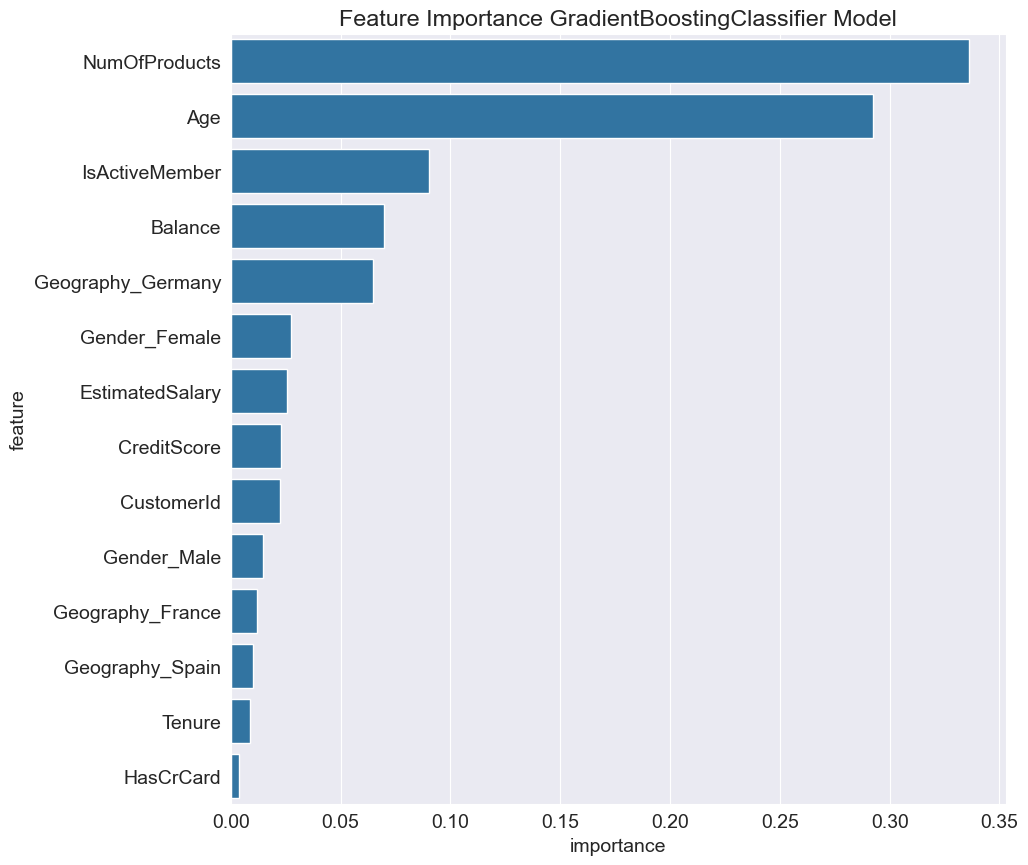

In [47]:
gradient_boosting_classifier.plot_importance_df()

## Ploting Confusion Matrix For Training and Validation dataset

0 - Not Churn

1 - Churn

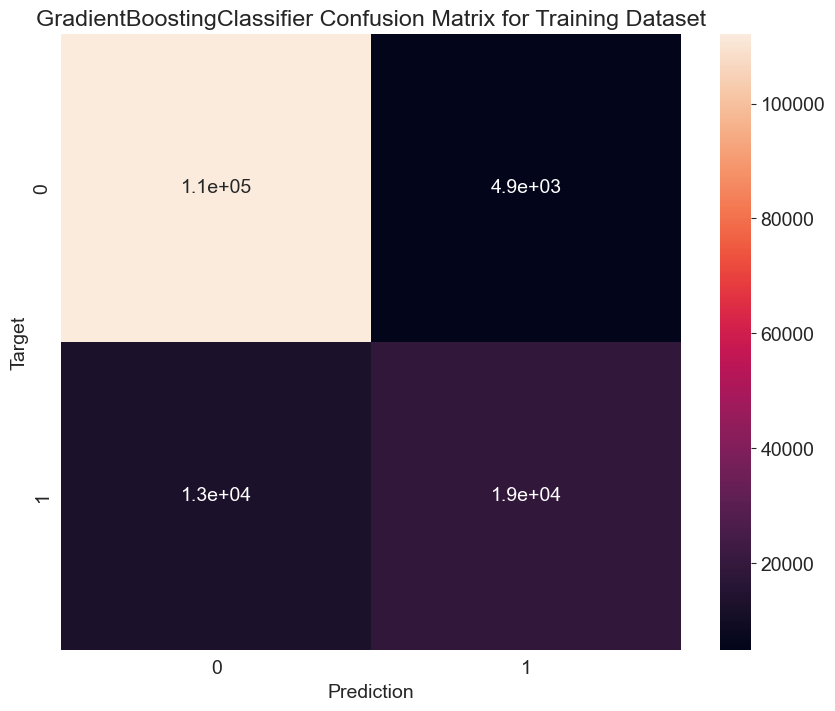

In [48]:
gradient_boosting_classifier.plot_confusion_matrix('Training',X_train,train_targets)

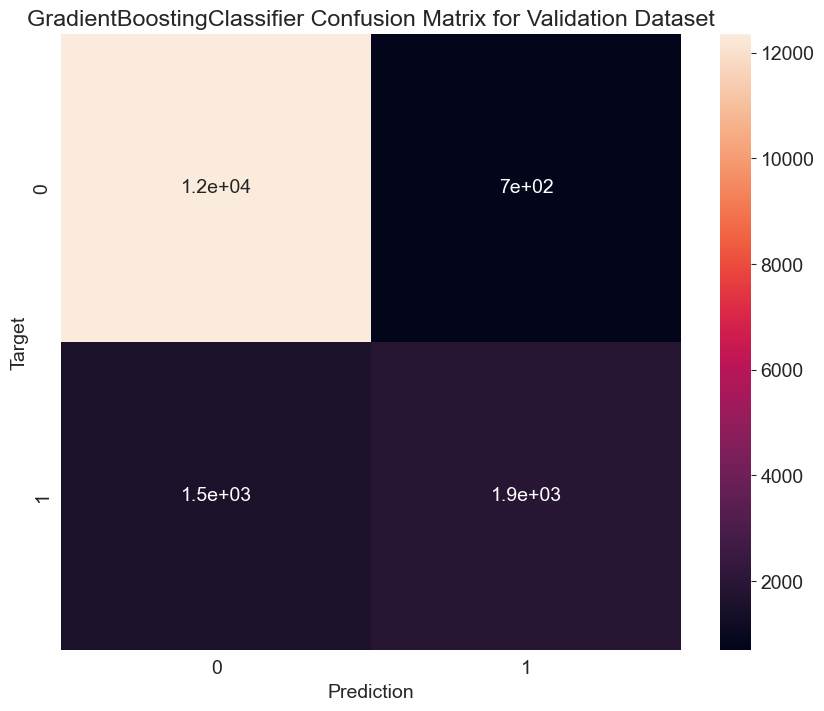

In [49]:
gradient_boosting_classifier.plot_confusion_matrix('Validation',X_val,val_targets)

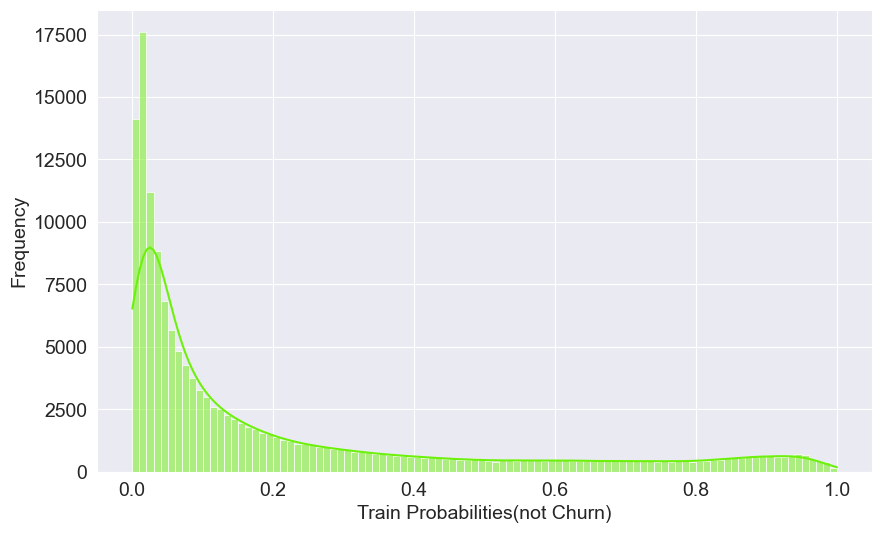

In [50]:
gradient_boosting_classifier.plot_histplot_probabilities(X_train)

## Lightgbm for Classification

In [51]:
from lightgbm import LGBMClassifier

In [52]:
lgbm_params = { 'max_depth': 10,
                'min_child_samples': 16,
                'learning_rate': 0.10470758458539718, 
                'n_estimators': 450, 
                'subsample': 0.1021113390922922, 
                'colsample_bytree': 0.26875293244907866, 
                'reg_alpha': 0.9116287583076728, 
                'reg_lambda': 0.8603674419837019,
                'n_jobs ' : -1,
                'numn_leaves' : 30,

                }

lgbm_classifier = TryParameters('LGBMClassifier' , LGBMClassifier ,X_train,train_targets,X_val,val_targets , **lgbm_params )

[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 31474, number of negative: 117056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Nu

In [53]:
lgbm_classifier.train_model()

[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Model :  LGBMClassifier(colsample_bytree=0.26875293244907866,
               learning_rate=0.10470758458539718, max_depth=10,
               min_child_samples=16, n_estimators=450, n_jobs =-1,
               numn_leaves=30, reg_alpha=0.9116287583076728,
               reg_lambda=0.8603674419837019, subsample=0.1021113390922922)
Train acc :  87.830067

In [54]:
make_submission(LGBMClassifier,**lgbm_params)

[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 31474, number of negative: 117056
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Nu

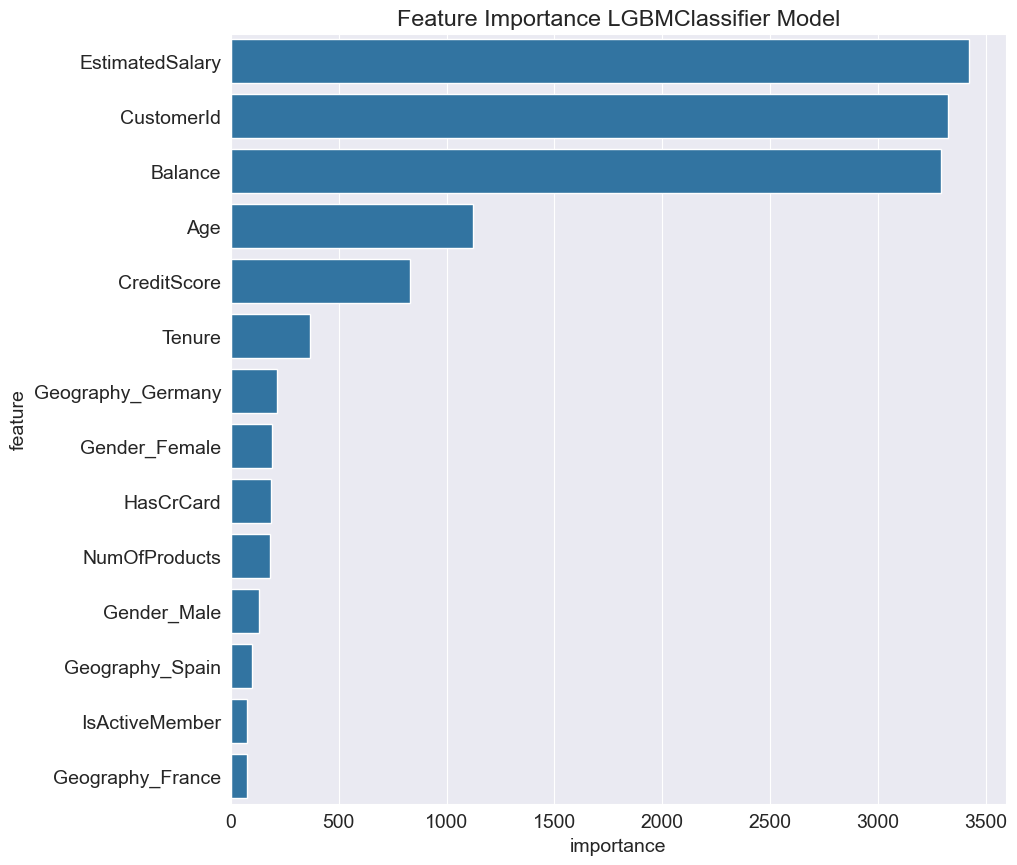

In [55]:
lgbm_classifier.plot_importance_df()

[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


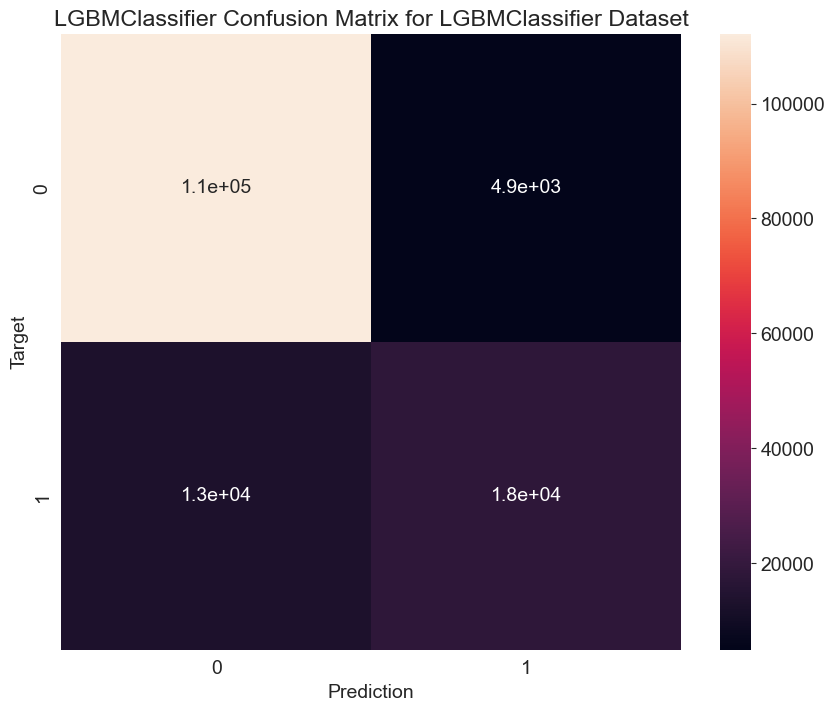

In [56]:
lgbm_classifier.plot_confusion_matrix('LGBMClassifier' , X_train,train_targets)

[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


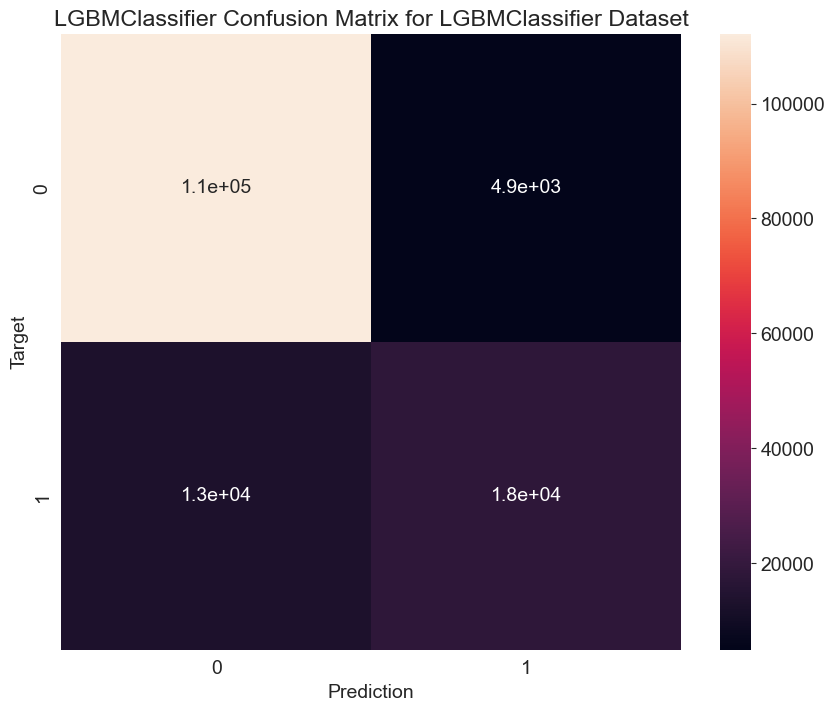

In [57]:
lgbm_classifier.plot_confusion_matrix('LGBMClassifier' , X_train,train_targets)

[LightGBM] [Warning] Unknown parameter: -1
[LightGBM] [Warning] Unknown parameter: numn_leaves
[LightGBM] [Warning] num_threads is set=12, n_jobs= will be ignored. Current value: num_threads=12
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


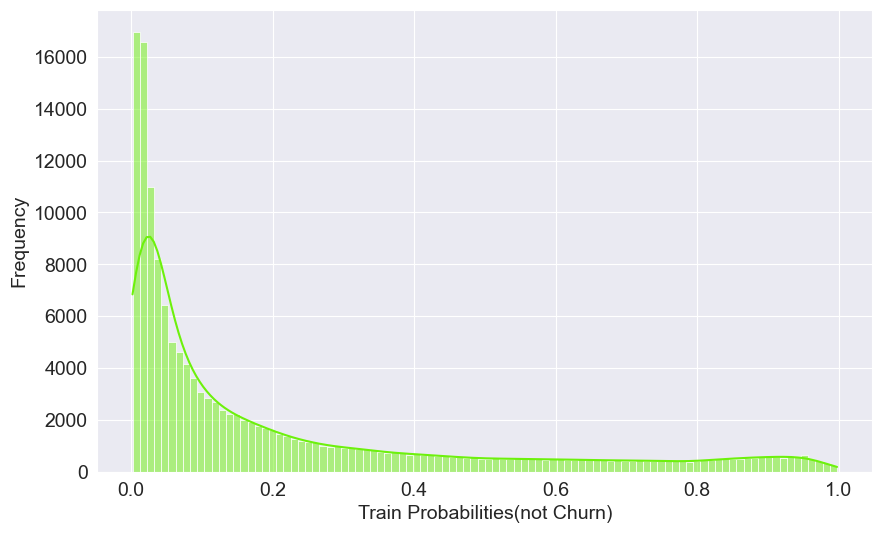

In [58]:
lgbm_classifier.plot_histplot_probabilities(X_train)

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb_params = {'max_depth': 8, 
                     'min_child_weight': 7, 
                     'learning_rate': 0.05360287695691775, 
                     'n_estimators': 350, 
                     'subsample': 0.7493687060964804, 
                     'colsample_bytree': 0.2329351765096604, 
                     'random_state': 42}

xgb_classifier = TryParameters('XGBClassifier' , XGBClassifier ,X_train,train_targets,X_val,val_targets , **xgb_params )

In [61]:
xgb_classifier.train_model()

Model :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2329351765096604, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05360287695691775,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Train acc :  87.44698040799838
val acc :  86.30634997576345


In [62]:
make_submission(XGBClassifier,**xgb_params)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
log_params = {
    'tol' : 1e-6,
    'random_state' : 0,
    'solver' :'saga',
    'max_iter' : 2000,
    'n_jobs' : -1
}

log_model = TryParameters('LogisticRegression' , LogisticRegression ,X_train,train_targets,X_val,val_targets , **log_params )

In [65]:
log_model.train_model()

Model :  LogisticRegression(max_iter=2000, n_jobs=-1, random_state=0, solver='saga',
                   tol=1e-06)
Train acc :  83.42287753315829
val acc :  83.34949103247698


In [66]:
make_submission(LogisticRegression, **log_params)